# 6. Region properties exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.morphology
import skimage.io

1.Import the image in 'http://wiki.cmci.info/sampleimages/4color_cells.tif'

In [9]:
image_stack = skimage.io.imread('http://wiki.cmci.info/sampleimages/4color_cells.tif')

2. Create a mask using the second channel

In [16]:
image_mask1 = image_stack[:,:,2] > skimage.filters.threshold_otsu(image_stack[:,:,2])

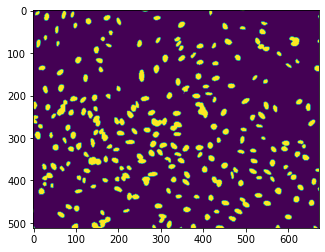

In [17]:
plt.imshow(image_mask1)

3. Create a labeled image of the mask

In [18]:
mask1_label = skimage.morphology.label(image_mask1)

4. Measure the region properties using this labeled image and use the **fourth** channel as intensity image

In [39]:
my_regions = skimage.measure.regionprops_table(
    mask1_label, intensity_image = image_stack[:,:,3], properties=('label', 'mean_intensity'))

5. Extract the ```mean_intensity``` property from the dictionary

In [40]:
intensities = my_regions['mean_intensity']

6. Plot a histogram of these intensities

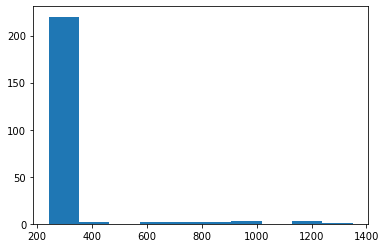

In [41]:
plt.hist(intensities)
plt.show()

7. What do you observe in this histogram ? Plot the fourth channel and see if the histogram makes sense.

The histogram can be split into two parts. Most nuclei have almost no signal (around 0). A few have much more signal between 10 and 80. The plot of the third channel shows that only a few nuclei are expressing a specific protein that is fluorescent.

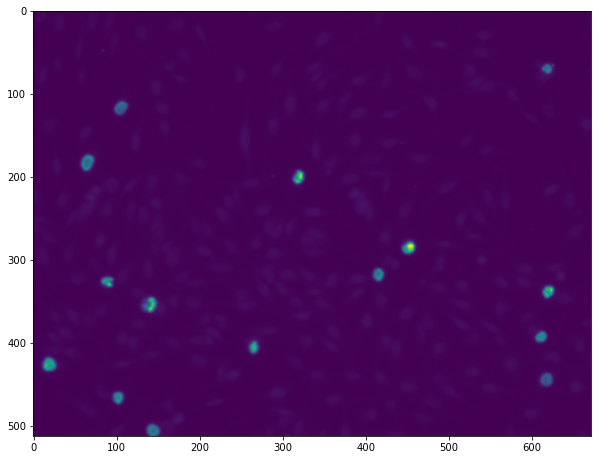

In [29]:
plt.subplots(figsize = (10,10))
plt.imshow(image_stack[:,:,3])
plt.show()

We can count how many nuclei are above some threshold:

In [31]:
np.array(intensities) > 400

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [32]:
np.sum(np.array(intensities) > 400)

15